In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## One dimensional Gaussian distribution

一维高斯分布的概率密度函数如下：   

$$
N(x\mid \mu,\sigma)=\frac{1}{\sqrt{2\pi}\cdot\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})
$$

给定一些服从高斯分布的数据，通常利用极大似然估计法估计高斯分布的参数$\mu$和$\sigma$。
$$
L(\mu,\sigma)=\prod_{i=1}^MN(x_i\mid \mu,\sigma)
$$

$M$表示样本总量，我们要求解：  

$$
\mu^*,\sigma^*=arg\max_{\mu,\sigma}L(\mu,\sigma)
$$  

可以简单的理解为让样本出现的概率尽可能的大，由于累乘不好计算，通常会对似然函数取对数，将乘号变为加号，这时的目标函数表示如下：   

$$
L(\mu,\sigma)=\log(\prod_{i=1}^Mp(x_i\mid \mu,\sigma))=-M\log(\sqrt{2\pi}\cdot\sigma)-\sum_{i=1}^M\frac{(x-\mu)^2}{2\sigma^2}
$$ 

显然取对数后的最优解和取对数前一致，由于极值点必然是导数为0的点，所以，我们分别让$L(\mu,\sigma)$对$\mu,\sigma$求偏导，并令其为0，即可得到$\mu^*,\sigma^*$：  

$$
\frac{\partial L(\mu,\sigma)}{\partial \mu}=\frac{1}{\sigma^2}\sum_{i=1}^M(x_i-\mu)=0\Rightarrow \mu^*=\frac{\sum_{i=1}^Mx_i}{M}
$$

$$
\frac{\partial L(\mu,\sigma)}{\partial \sigma}=-M\frac{1}{\sigma}+\sum_{i=1}^M(x-\mu)^2\sigma^{-3}=0\Rightarrow\sigma^*=\sqrt{\frac{\sum_{i=1}^M(x-\mu^*)^2}{M}}
$$

实际上这里对于均值的估计是无偏，而对于方差的估计是有偏的。

(-0.1, 1.0)

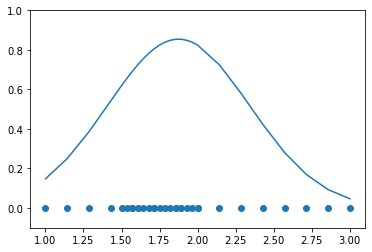

In [11]:
data=np.sort(np.linspace(1,3,15).tolist()+np.linspace(1.5,2,15).tolist())
def gaussian_1d(x,u,sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1*np.power(x-u,2)/(2*sigma**2))
u=np.mean(data)
sigma=np.std(data)
plt.scatter(data,[0]*len(data))
plt.plot(data,gaussian_1d(data,u,sigma))
plt.ylim(-0.1,1)

## Mixed Gaussian distribution

对于单个的高斯分布来说通过以上的求解会起到非常好的效果，但是假如数据是由多个高斯分布混合生成的，那么用原始的一维高斯分布进行拟合效果就会大幅度下降。

(-0.1, 1.0)

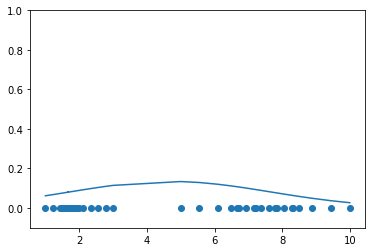

In [12]:
data1=sorted(np.linspace(1,3,10).tolist()+np.linspace(1.5,2,10).tolist())
data2=sorted(np.linspace(5,10,10).tolist()+np.linspace(6.5,8.5,10).tolist())
u=np.mean(data1+data2)
sigma=np.std(data1+data2)
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,gaussian_1d(data1+data2,u,sigma))
plt.ylim(-0.1,1)

直接用1个高斯分布对上述数据进行拟合明显误差较大，根据数据分布的密度来看，明显可能是由两个高斯分布生成的。我们分别构建两个高斯分布去拟合数据。

(-0.1, 1.0)

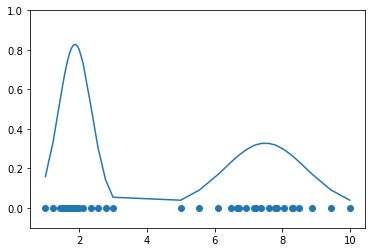

In [13]:
data1=sorted(np.linspace(1,3,10).tolist()+np.linspace(1.5,2,10).tolist())
data2=sorted(np.linspace(5,10,10).tolist()+np.linspace(6.5,8.5,10).tolist())
u1=np.mean(data1)
u2=np.mean(data2)
sigma1=np.std(data1)
sigma2=np.std(data2)
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,gaussian_1d(data1+data2,u1,sigma1)+gaussian_1d(data1+data2,u2,sigma2))
plt.ylim(-0.1,1)

实际上上图的概率密度函数的面积为2，显然不合理，可以将两个高斯分布的权重都设置为0.5，实际上只要满足
$$
\alpha_1+\alpha_2=1,\alpha_1\geq 0,\alpha_2\geq 0
$$  
即可。

(-0.1, 1.0)

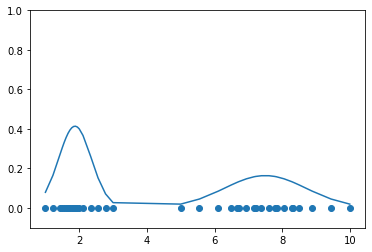

In [14]:
alpha1=0.5
alpha2=0.5
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,alpha1*gaussian_1d(data1+data2,u1,sigma1)+alpha2*gaussian_1d(data1+data2,u2,sigma2))
plt.ylim(-0.1,1)

对于上述模型的求解我们实际上是人为指定了数据是由两个高斯分布混合而成的，而且还认为指定了两个高斯分布的的权重为0.5。实际上，我们希望算法能够从数据中学习这些信息，而且，有些数据分布是无法通过观测得到每个高斯分布所占的权重的。

假设数据是有两个高斯分布混合而成的，那么高斯混合模型可以表示为：
$$
P(x\mid\theta)=\alpha_1N_1(x\mid \mu_1,\sigma_1)+(1-\alpha_1)N_2(x\mid \mu_2,\sigma_2)=\sum_{i=1}^2\alpha_iN_i(x\mid \mu_i,\sigma_i),\alpha_2=1-\alpha_1
$$  

其中，模型参数为$\theta=\{u_1,\sigma_1,u_2,\sigma_2,\alpha_1\}$。那么通过极大似然估计来求解模型参数：

$$
L(\theta)=log(\prod_{i=1}^MP(x_i\mid \theta))=\sum_{i=1}^MlogP(x_i\mid \theta)=\sum_{i=1}^Mlog[\sum_{k=1}^2\alpha_kN_k(x_i\mid \mu_k,\sigma_k)]
$$  

求解方法也是对参数求偏导：
$$
\frac{\partial L(\theta)}{\partial \mu_k}=\sum_{i=1}^M\frac{\frac{\alpha_k(x_i-\mu_k)}{\sqrt{2\pi}\sigma_k^3}exp(-\frac{(x_i-\mu_k)^2}{2\sigma_k^2})}{\sum_{j=1}^2\alpha_jN_j(x_i\mid \mu_j,\sigma_j)}=0 
$$  

很明显直接求解一定是求不出来的，因此通常采用EM算法。